# Изучение рынка заведений общественного питания Москвы

- Автор: Котов Алексей
- Дата: 12.11.2025

### Цели и задачи проекта

По условию инвесторы хотят открыть заведение одной из трех категорий: кафе, ресторан или бар. Также не определены цены и расположение заведения.

Цель:

Провести исследовательский анализ рынка заведений общественного питания Москвы.

Задачи:
- Загрузить и предобработать данные.
- Исследовать распределение заведений по категориям.
- Исследовать распределение заведений по административным районам Москвы.
- Изучить соотношение сетевых и несетевых заведений.
- Исследовать количество посадочных мест в заведениях.
- Исследовать рейтинг заведений.
- Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений.
- Найти и исследовать топ-15 популярных сетей в Москве.
- Изучите вариацию среднего чека заведения в зависимости от района Москвы.
- Все результаты сопроводить подходящими визуализациями.

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки).
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

#### [1. Загрузка данных и знакомство с ними](#1-bullet)
1. Загрузка библиотек
2. Загрузка датасетов
3. Промежуточный вывод
4. Подготовка единого датафрейма

#### [2. Предобработка данных](#2-bullet)
1. Проверка и оптимизация типов данных
2. Проверка пропусков в данных
3. Обработка дубликатов
4. Создание нового поля `is_24_7`
5. Промежуточный вывод


#### [3. Исследовательский анализ данных](#3-bullet)
- Задача 1
- Задача 2
- Задача 3
- Задача 4
- Задача 5
- Задача 6
- Задача 7
- Задача 8
- Промежуточный вывод

#### [4. Итоговый вывод и рекомендации](#4-bullet)
- Общий обзор проделанной работы
- Ответы на исследовательские вопросы, или главные выводы
- Рекомендации на основе анализа данных

---

<a class="anchor" id="1-bullet"></a>
# 1. Загрузка данных и знакомство с ними

## 1.1. Загрузка библиотек

Начнём с загрузки библиотек, будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik # установка библиотеки в Google Colab
from phik import phik_matrix

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты правильно делаешь, что импортируешь все библиотеки отдельно в первой ячейке. Это правило хорошего тона, которое позволит твоим коллегам сразу увидеть все необходимые библиотеки для работы с твоим файлом.
</div>

## 1.2. Загрузка датасетов

Затем загрузим датасеты `rest_info.csv` и `rest_price.csv` с данными о заведениях общественного питания Москвы.

Пути к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [2]:
# Выгружаем данные в переменные
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датафрейма `rest_info_df` датасета `rest_info.csv` и изучим общую информацию.

Выведем первые строки методом `head()`, а сводную информацию о датафрейме - методом `info()`.

In [3]:
# Выводим первые строки датафрейма на экран
rest_info_df.head(3)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0


In [4]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Теперь познакомимся с данными датафрейма `rest_price_df` датасета `rest_price.csv` и изучим общую информацию.

Выведем первые строки методом `head()`, а сводную информацию о датафрейме - методом `info()`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

## 1.3. Промежуточный вывод

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания:
- Есть столбец `id`, не представленный в описании данных, надо проверить: возможно, это первичный ключ таблицы.
- Столбцы имеют удобные названия, поэтому менять названия не надо.
- Столбцы `id`, `name`, `category`, `address`, `district` и `hours` имеют тип `object` и хранят текстовую информацию.
- Стоит рассмотреть возможность разделения информации из поля `hours` на несколько отдельных полей, например: числовое поле с бинарными значениями наличия признака - постоянного ежедневного графика работы; числовые поля с временем открытия и закрытия заведения и т. д.
- Столбцы `rating` и `seats` хранят числовые значения типов `float64`.
- По описанию данных максимальное значение поля `rating` не может быть больше `5.0`, поэтому вещественный тип нужно сохранить, но рекомендуется оптимизировать размерность.
- Поле `seats` должно хранить целочисленные значения количества посадочных мест, но из-за пропусков имеет вещественный тип. Рекомендуется заполнить пропуски целочисленным значением-индикатором и изменить тип поля на `int`, оптимизировав размерность.
- Столбец `chain` типа `int64` хранит бинарное значение отсутствия - `0` и наличия - `1` признака. Рекомендуется оптимизировать размерность данного поля.
- Пропуски содержатся только в столбцах `hours` (536 пропусков) и `seats` (3611 пропусков) из 8406 строк. Однако рекомендуется проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания:
- Есть столбец `id`, не представленный в описании данных, надо проверить: возможно, это первичный ключ таблицы.
- Столбцы имеют удобные названия, поэтому менять названия не надо.
- Типы данных соответствуют содержимому.
- Вещественный тип данных столбцов `middle_avg_bill` и `middle_coffee_cup` можно попробовать оптимизировать с понижением размерности.
- Пропуски имеют все поля кроме `id`: больше всего пропусков у поля `middle_coffee_cup` (3523 пропуска) и меньше всего пропусков у поля `avg_bill` (242 пропуска) из 4058 строк.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

**Первичное знакомство показывает, что данные соответствуют описанию и выглядят корректными.**

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Первичный анализ данных выполнен верно. Ты используешь подходящие способы для анализа и делаешь верные выводы. 
</div>

## 1.4. Подготовка единого датафрейма

Объединим данные двух датасетов в один под названием `df`, с которым продолжим работу для поиска закономерностей в данных: общую информацию о заведениях общественного питания из `rest_info_df` соединим с данными о среднем чеке в заведениях `rest_price_df`.

Чтобы понять, по какому полю присоединять датасеты, проверим, что id - это первичный ключ в таблицах.

In [7]:
# Выведем количество строк в датафреймах и количество уникальных значений в поле id
print(f'Общее количество строк в "rest_info": {rest_info_df.shape[0]}')
print(f'Количество уникальных значений в поле "id": {rest_info_df["id"].nunique()}')

print(f'\nОбщее количество строк в "rest_price": {rest_price_df.shape[0]}')
print(f'Количество уникальных значений в поле "id": {rest_price_df["id"].nunique()}')

Общее количество строк в "rest_info": 8406
Количество уникальных значений в поле "id": 8406

Общее количество строк в "rest_price": 4058
Количество уникальных значений в поле "id": 4058


Поле `id` действительно является первичным ключем в двух таблицах, т. е. уникальным индентификатором заведения, поэтому соединять данные таблиц будем по нему.
К датафрейму `rest_info_df` присоединим `rest_price_df` с типом присоединения `left`, чтобы не потерять основную информацию о всех заведениях. Новый единый датафрейм назовем `df`.

In [8]:
# К rest_info_df левым присоединением добавляем rest_price_df по полю id и сохраняем в df
df = pd.merge(rest_info_df, rest_price_df, on='id', how='left')

# Выведем первые строки единого датафрейма df
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# Выведем общую информацию по единому датафрейму df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Объединение двух датафреймов `rest_info_df` и `rest_price_df` в один единый датафрейм `df` прошло успешно.
Новый датафрейм `df` содержит 13 столбцов из двух датафреймов и 8406 строк как в `rest_info_df`, к которому левым присоединением добавили `rest_price_df`.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что проверяешь корректность объединения датафреймов. Важно ничего не потерять, иначе мы можем получить некорректные результаты дальше
</div>

<a class="anchor" id="2-bullet"></a>
# 2. Предобработка данных

## 2.1. Проверка и оптимизация типов данных

Изучим корректность типов данных, при необходимости проведем их преобразование.

In [10]:
# Выведем первые строки единого датафрейма df
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [11]:
# выведем общую информацию по единому датафрейму df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Оптимизируем поля `rating`, `middle_avg_bill` и `middle_coffee_cup` с вещественными числами, уменьшив размерность данных.
Оптимизируем поле `chain` с бинарными целочисленными значениями, уменьшив размерность данных.
Заполним пропуски в поле `seats` значением-индикатором `-1`, что будет значить отсуствие данных, и преобразуем тип в целочисленный с уменьшением размерности данных.

In [12]:
# В цикле оптимизируем вещественный тип данных
for column in ['rating', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')

# Заполняем пропуски в поле
df['seats'] = df['seats'].fillna(-1)

# В цикле оптимизируем целочисленный тип данных
for column in ['chain', 'seats']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

# Выведем типы данных датафрейма
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                  int16
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В данном случае пропуски можно вообще не заполнять. Заглушку можно использовать, но важно в дальнейшем не забыть про нее
</div>

Типы данных были успешно оптимизированы с понижением размерности:
- Поля `rating`, `middle_avg_bill` и `middle_coffee_cup` изменили тип с `float64` на `float32`.
- Поле `chain` изменило тип с `int64` на `int8`.
- Поле `seats` изменило тип с `float64` на `int16` вместе с заменой 3611 пропусков на значение-индикатор `-1`.

Добавим столбец `abbreviated_district` с аббревиатурами округов для удобства работы.

In [13]:
# Словарь сокращений
district_mapping = {
    'Центральный административный округ': 'ЦАО',
    'Восточный административный округ': 'ВАО',
    'Западный административный округ': 'ЗАО',
    'Северный административный округ': 'САО',
    'Северо-Восточный административный округ': 'СВАО',
    'Северо-Западный административный округ': 'СЗАО',
    'Южный административный округ': 'ЮАО',
    'Юго-Восточный административный округ': 'ЮВАО',
    'Юго-Западный административный округ': 'ЮЗАО'
}
# Добавим столбец с сокращенными названиями округов
df['abbreviated_district'] = df['district'].replace(district_mapping)

# Выведем первые строки датафрейма с округами
df[['district', 'abbreviated_district']].head()

,district,abbreviated_district
0,Северный административный округ,САО
1,Северный административный округ,САО
2,Северный административный округ,САО
3,Северный административный округ,САО
4,Северный административный округ,САО


## 2.2. Проверка пропусков в данных

Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположим гипотезы их появления.
В зависимости от ситуации проведем обработку пропущенных значений: можем заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [14]:
# Выведем количество пропусков в полях датафрейма
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup       7871
middle_avg_bill         5257
price                   5091
avg_bill                4590
hours                    536
id                         0
name                       0
category                   0
address                    0
district                   0
rating                     0
chain                      0
seats                      0
abbreviated_district       0
dtype: int64

In [15]:
# Выведем долю пропусков в процентах в полях датафрейма
df.isna().mean().sort_values(ascending=False) * 100

middle_coffee_cup       93.635498
middle_avg_bill         62.538663
price                   60.563883
avg_bill                54.603854
hours                    6.376398
id                       0.000000
name                     0.000000
category                 0.000000
address                  0.000000
district                 0.000000
rating                   0.000000
chain                    0.000000
seats                    0.000000
abbreviated_district     0.000000
dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличный способ посмотреть долю пропусков!
</div>

Пропуски содержатся в следующих полях:
- `middle_coffee_cup`: 7871 из 8406 строк (94%);
- `middle_avg_bill`: 5257 из 8406 строк (63%);
- `price`: 5091 из 8406 строк (61%);
- `avg_bill`: 4590 из 8406 строк (55%);
- `hours`: 536 из 8406 строк (6%).

Не забудем, что в предыдущем этапе в поле `seats` заменили 3611 пропуск на значение-индикатор `-1`, чтобы оптимизировать тип данных данного поля.

Возможные причины возникновения:
- технические ошибки во время формирования исходных датасетов;
- изначально отсутствие данной информации о заведениях в сервисах;
- существенное количество пропусков в полях `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` из-за объединение двух датафреймов с помощью левого присоединения в предыдущем этапе.

Для полей `middle_coffee_cup` и `middle_avg_bill` информация была извлечена из поля `avg_bill` при наличии в ячейках определенных подстрок `Цена одной чашки капучино` и `Средний счёт` соотвественно. Поэтому рекомендуется проверить поле `avg_bill` на содержание неявных дубликатов указанных подстрок для извлечения дополнительной информации для заполнения пропусков в полях `middle_coffee_cup` и `middle_avg_bill`.

Пропуски в числовых полях `middle_coffee_cup` и `middle_avg_bill` заполнять числовыми значениями не будем, агрегирующие функции будут просто пропускать пустые значения.

Пропуски в текстовых полях `hours`, `price` и `avg_bill` заполним значением-индикатором `неизвестно`.

In [16]:
# Заполним пропуски в трех полях значением "неизвестно"
df[['hours', 'price', 'avg_bill']] = df[['hours', 'price', 'avg_bill']].fillna('неизвестно')

# Выведем количество пропусков в полях датафрейма
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup       7871
middle_avg_bill         5257
id                         0
name                       0
category                   0
address                    0
district                   0
hours                      0
rating                     0
chain                      0
seats                      0
price                      0
avg_bill                   0
abbreviated_district       0
dtype: int64

Пропуски в полях `hours`, `price` и `avg_bill` успешно заполнили. Пропуски в числовых полях `middle_coffee_cup` и `middle_avg_bill` остались без изменений.

## 2.3. Обработка дубликатов

Проверим данные на явные и неявные дубликаты, например, поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах, например, с названием заведения.

Выведем снова основную информацию датафрейма и первые строки.

In [17]:
# Выведем основную информацию датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8406 non-null   object 
 1   name                  8406 non-null   object 
 2   category              8406 non-null   object 
 3   address               8406 non-null   object 
 4   district              8406 non-null   object 
 5   hours                 8406 non-null   object 
 6   rating                8406 non-null   float32
 7   chain                 8406 non-null   int8   
 8   seats                 8406 non-null   int16  
 9   price                 8406 non-null   object 
 10  avg_bill              8406 non-null   object 
 11  middle_avg_bill       3149 non-null   float32
 12  middle_coffee_cup     535 non-null    float32
 13  abbreviated_district  8406 non-null   object 
dtypes: float32(3), int16(1), int8(1), object(9)
memory usage: 779.9+ KB


In [18]:
# Выведем первые строки датафрейма
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,abbreviated_district
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,неизвестно,неизвестно,NaN,NaN,САО
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,САО
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,САО
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,неизвестно,Цена чашки капучино:155–185 ₽,NaN,170.0,САО
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,САО


Начнём с полных явных дубликатов

In [19]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

Изначально полных явных дубликатов нет. Проверим дубликаты по полю `id` заведений, значения данного поля должны быть уникальными.

In [20]:
# Проверяем неявные дубликаты по полю id в датафрейме
df.duplicated(subset='id').sum()

0

Действительно, все значения поля `id` уникальны.

Проверим: есть ли дубликаты одновременно по названию и адресу до нормализации.

In [21]:
# Проверяем неявные дубликаты по названию и адресу до нормализации в датафрейме
df.duplicated(subset=['name', 'address'], keep=False).sum()

0

Дубликатов одновременно по названию и адресу до нормализации нет.

*Стоит отметить, что юридически названия с разными регистрами букв и символами в названии могут считаться схожими, особенно если род деятельности компаний тоже одинаковый. Но наша цель не выявлять нарушения фирменного названия, а выявить задвоенные записи одного и того же заведения по одному адресу, т. е. неявные дубликаты одновременно по названию и адресу.*

Нормализуем названия заведений в поле `name`:
- с обеих сторон удаляем пробелы;
- с помощью регулярных выражений заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание);
- переводим все буквы верхний регистр.
Сохраним результат в новое поле `name_norm`.

In [22]:
# Удаляем пробелы с обеих сторон строки
df['name_norm'] = df['name'].str.strip()

# Заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание) с помощью регулярных выражений
df['name_norm'] = df['name_norm'].str.replace(r'[^\w]+', '_', regex=True)

# Все буквы переводим в верхний регистр
df['name_norm'] = df['name_norm'].str.upper()

# Выводим для первых записей названия заведений
df[['name', 'name_norm']].head()

,name,name_norm
0,WoWфли,WOWФЛИ
1,Четыре комнаты,ЧЕТЫРЕ_КОМНАТЫ
2,Хазри,ХАЗРИ
3,Dormouse Coffee Shop,DORMOUSE_COFFEE_SHOP
4,Иль Марко,ИЛЬ_МАРКО


Нормализуем адреса в поле `address`:
- с обеих сторон удаляем пробелы;
- удалим слова относящиеся к адресу, но стоящие то до названия, то после названия: `аллея`, `бульвар`, `переулок`, `площадь`, `проезд`, `проспект`, `тупик`, `улица`, `шоссе`;
- удалим слова `корп`, `стр`;
- заменяем буквы между номером дома и корпусом/строением в строке ("к" или "с") на нижнее подчёркивание с помощью регулярных выражений;
- переводим все буквы верхний регистр;
- с помощью регулярных выражений заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание).
Результат сохраним в новое поле `address_norm`.

In [23]:
# Удаляем пробелы с обеих сторон строки
df['address_norm'] = df['address'].str.strip()

# Список слов для удаления
stop_words = ['аллея', 'бульвар', 'переулок', 'площадь', 'проезд', 'проспект', 'тупик', 'улица', 'шоссе', 'корп', 'стр']
# Применяем замену слов из stop_words на пустоту
for word in stop_words:
    df['address_norm'] = df['address_norm'].str.replace(word, '', regex=False)

# Заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание) с помощью регулярных выражений
df['address_norm'] = df['address_norm'].str.replace(r'[^\w]+', '_', regex=True)

# Все буквы переводим в верхний регистр
df['address_norm'] = df['address_norm'].str.upper()

# Заменяем буквы между номером дома и корпусом/строением в строке ("к" или "с") на нижнее подчёркивание с помощью регулярных выражений
df['address_norm'] = df['address_norm'].str.replace(r'(\d)([a-яА-Я])(\d)', r'\1_\3', regex=True)

# Выводим для первых записей адреса заведений
df[['address', 'address_norm']].head()

,address,address_norm
0,"Москва, улица Дыбенко, 7/1",МОСКВА_ДЫБЕНКО_7_1
1,"Москва, улица Дыбенко, 36, корп. 1",МОСКВА_ДЫБЕНКО_36_1
2,"Москва, Клязьминская улица, 15",МОСКВА_КЛЯЗЬМИНСКАЯ_15
3,"Москва, улица Маршала Федоренко, 12",МОСКВА_МАРШАЛА_ФЕДОРЕНКО_12
4,"Москва, Правобережная улица, 1Б",МОСКВА_ПРАВОБЕРЕЖНАЯ_1Б


Проверим: есть ли теперь дубликаты одновременно по названию и адресу после нормализации.

In [24]:
# Проверяем неявные дубликаты по названию и адресу до нормализации в датафрейме
df.duplicated(subset=['name_norm', 'address_norm'], keep=False).sum()

8

Найдено лишь 8 дубликатов одновременно по названию и адресу после нормализации, поэтому выведем их целиком.

In [25]:
# Проверяем неявные дубликаты по названию и адресу после нормализации в датафрейме
df[df.duplicated(subset=['name_norm', 'address_norm'], keep=False)].sort_values(by='name')

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,abbreviated_district,name_norm,address_norm
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,неизвестно,неизвестно,NaN,NaN,САО,MORE_POKE,МОСКВА_ВОЛОКОЛАМСКОЕ_11_2
1430,62608690e9cc464fbcd980cfd552e334,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,неизвестно,неизвестно,NaN,NaN,САО,MORE_POKE,МОСКВА_ВОЛОКОЛАМСКОЕ_11_2
189,072032ce16dc47bfbc63b672c75bd371,Кафе,кафе,"Москва, парк Ангарские Пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,-1,неизвестно,неизвестно,NaN,NaN,САО,КАФЕ,МОСКВА_ПАРК_АНГАРСКИЕ_ПРУДЫ
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,-1,неизвестно,неизвестно,NaN,NaN,САО,КАФЕ,МОСКВА_ПАРК_АНГАРСКИЕ_ПРУДЫ
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,Раковарня Клешни и Хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,неизвестно,неизвестно,NaN,NaN,СВАО,РАКОВАРНЯ_КЛЕШНИ_И_ХВОСТЫ,МОСКВА_МИРА_118
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,неизвестно,неизвестно,NaN,NaN,СВАО,РАКОВАРНЯ_КЛЕШНИ_И_ХВОСТЫ,МОСКВА_МИРА_118
3091,3c2a73ea79a04be48858fab3685f2f37,Хлеб да Выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,неизвестно,неизвестно,NaN,NaN,ЗАО,ХЛЕБ_ДА_ВЫПЕЧКА,МОСКВА_ЯРЦЕВСКАЯ_19
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,неизвестно,4.1,0,276,неизвестно,неизвестно,NaN,NaN,ЗАО,ХЛЕБ_ДА_ВЫПЕЧКА,МОСКВА_ЯРЦЕВСКАЯ_19


Различия дубликатов только в категории, графике работы и в признаке сетевое ли заведение. Удалим дубликаты, сохраняя только первый экземпляр.

In [26]:
# Удаляем в датафрейме дубликаты по названию и адресу после нормализации, сохраняя первые экземпляры
df.drop_duplicates(subset=['name_norm', 'address_norm'], keep='first', inplace=True)

# Проверим наличие дубликатов
df.duplicated(subset=['name_norm', 'address_norm'], keep=False).sum()

0

In [27]:
# Выводим новое количество строк в датафрейме
df.shape[0]

8402

После удаления 4 дубликатов из 8406 строк, осталось 8402 строки.

Теперь проверим корректность написания категориальных значений в полях `category`, `district`, `abbreviated_district`, `chain` и `price`.

In [28]:
# Выводим количество уникальных значений для выбранного поля
df['category'].value_counts().sort_index()

бар,паб             764
булочная            256
быстрое питание     603
кафе               2376
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
Name: category, dtype: int64

В поле `category` нет неявных дубликатов, содержится 8 уникальных категорий заведений.

In [29]:
# Выводим количество уникальных значений для выбранного поля
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [30]:
# Выводим количество уникальных значений для выбранного поля
df['abbreviated_district'].value_counts()

ЦАО     2242
САО      898
ЮАО      892
СВАО     890
ЗАО      850
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: abbreviated_district, dtype: int64

В полях `district` и `abbreviated_district` нет неявных дубликатов, содержится 9 уникальных округов города.

In [31]:
# Выводим количество уникальных значений для выбранного поля
df['chain'].value_counts()

0    5199
1    3203
Name: chain, dtype: int64

В поле `chain` нет посторонних значений, только бинарные значения - признак сетевого заведения.

In [32]:
# Выводим количество уникальных значений для выбранного поля
df['price'].value_counts()

неизвестно       5087
средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

В поле `price` нет неявных дубликатов, содержится 5 уникальных ценовых категорий: 4 категории `низкие`, `средние`, `выше среднего` , `высокие` были изначально, и 1 категория `неизвестно` была добавлена на прошлом этапе вместо пропусков.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Проверка на дубликаты выполнена! 
</div>

## 2.4. Создание нового поля `is_24_7`

Для дальнейшей работы требуется создать столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

In [33]:
# Создаём столбец is_24_7, присваивая значения из серии булевых значений с результатом проверки
# столбца на наличие одновременно слов 'ежедневно' и 'круглосуточно' без учета регистра
df['is_24_7'] = df['hours'].str.contains('ежедневно', case=False) & df['hours'].str.contains('круглосуточно', case=False)

# Выведем первые строки столбцов hours и is_24_7
df[['hours', 'is_24_7']].head()

,hours,is_24_7
0,"ежедневно, 10:00–22:00",False
1,"ежедневно, 10:00–22:00",False
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,"ежедневно, 09:00–22:00",False
4,"ежедневно, 10:00–22:00",False


In [34]:
# Выведем количество заведений, работающих ежедневно круглосуточно
df['is_24_7'].sum()

730

In [35]:
# Выведем долю в процентах заведений, работающих ежедневно круглосуточно
df['is_24_7'].mean() * 100

8.688407522018567

Успешно создан новый столбец `is_24_7` - булевый признак ежедневной круглосуточной работы заведения, т. е. работы в режиме "24/7".
Таких заведений оказалось 730, что составляет 8.7% от общего количества.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Новый столбец создан корректно
</div>

---

## 2.5. Промежуточный вывод

Проверка и оптимизация типов данных
- Типы данных были успешно оптимизированы с понижением размерности:
    - Поля `rating`, `middle_avg_bill` и `middle_coffee_cup` изменили тип с `float64` на `float32`.
    - Поле `chain` изменило тип с `int64` на `int8`.
    - Поле `seats` изменило тип с `float64` на `int16` вместе с заменой 3611 пропусков на значение-индикатор `-1`.
- Добавили столбец `abbreviated_district` с аббревиатурами округов для удобства работы.

Проверка пропусков в данных
- Пропуски содержались в следующих полях:
    - `middle_coffee_cup`: 7871 из 8406 строк (94%);
    - `middle_avg_bill`: 5257 из 8406 строк (63%);
    - `price`: 5091 из 8406 строк (61%);
    - `avg_bill`: 4590 из 8406 строк (55%);
    - `hours`: 536 из 8406 строк (6%).
- Возможные причины возникновения:
    - технические ошибки во время формирования исходных датасетов;
    - изначально отсутствие данной информации о заведениях в сервисах;
    - существенное количество пропусков в полях `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` из-за объединение двух датафреймов с помощью левого присоединения в предыдущем этапе.
- Для полей `middle_coffee_cup` и `middle_avg_bill` информация была извлечена из поля `avg_bill` при наличии в ячейках определенных подстрок `Цена одной чашки капучино` и `Средний счёт` соотвественно. Поэтому рекомендуется проверить поле `avg_bill` на содержание неявных дубликатов указанных подстрок для извлечения дополнительной информации для заполнения пропусков в полях `middle_coffee_cup` и `middle_avg_bill`.
- Пропуски в числовых полях `middle_coffee_cup` и `middle_avg_bill` заполнять числовыми значениями не будем, агрегирующие функции будут просто пропускать пустые значения.
- Пропуски в текстовых полях `hours`, `price` и `avg_bill` заполним значением-индикатором `неизвестно`.

Обработка дубликатов
- Изначально полных явных дубликатов не было.
- Нормализовали названия заведений в поле `name`:
    - с обеих сторон удаляем пробелы;
    - с помощью регулярных выражений заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание);
    - переводим все буквы верхний регистр;
    - cохранили результат в новое поле `name_norm`.
- Нормализовали адреса в поле `address`:
    - с обеих сторон удаляем пробелы;
    - удалим слова относящиеся к адресу, но стоящие то до названия, то после названия: `аллея`, `бульвар`, `переулок`, `площадь`, `проезд`, `проспект`, `тупик`, `улица`, `шоссе`;
    - удалим слова `корп`, `стр`;
    - заменяем буквы между номером дома и корпусом/строением в строке ("к" или "с") на нижнее подчёркивание с помощью регулярных выражений;
    - переводим все буквы верхний регистр;
    - с помощью регулярных выражений заменяем все символы кроме букв на нижнее подчеркивание (несколько знаков подряд на одно подчеркивание);
    - результат сохранили в новое поле `address_norm`.
- Найдено лишь 8 неявных дубликатов (менее 0.1% всех записей) одновременно по названию и адресу после нормализации:
    - Различия дубликатов только в категории, графике работы и в признаке сетевое ли заведение.
    - Удалили дубликаты, сохраняя только первый экземпляр.
    - После удаления 4 дубликатов из 8406 строк, осталось 8402 строки.
- Проверили отсутствие неявных дубликатов категориальных значений в полях `category`, `district`, `abbreviated_district`, `chain` и `price`.

Создание нового поля `is_24_7`
- Для дальнейшей работы создали столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
    - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
    - логическое значение `False` — в противоположном случае.
- Таких заведений оказалось 730 (8.7% от общего количества).

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>С предобработкой закончили, можно переходить к анализу!
</div>

<a class="anchor" id="3-bullet"></a>
# 3. Исследовательский анализ данных

---

## Задача 1

Исследуем количество объектов общественного питания по категориям.

In [36]:
# Определим функцию создания датафрейма с распределением заведений по значениям определенного столбца
def distribution_by_column(df, column, precision):
    """
    Функция на вход получает датафрейм 'df', название выбранного столбца 'column',
    по которому надо получить распределением уникальных значений методом .value_counts(),
    и точность округления долей в процентах 'precision'.

    Функция возвращает датафрейм 'temp_df', в котором будет три столбца:
    1. Первый столбец 'column' с названием выбранного столбца исходного датафрейма содержит уникальные значения.
    2. Второй столбец 'count' содержит количество уникальных значений.
    3. Третий столбец 'percent' содержит долю в процентах с точностью до 'precision' уникальных значений.
    """
    # Найдем количество уникальных значений столбца методом .value_counts(),
    # Сбрасываем индексы и серию преобразуем в датафрейм
    temp_df = df[column].value_counts().reset_index()

    # Явно задаём имена столбцов
    temp_df.columns = [column, 'count']

    # Добавляем столбец с долями в процентах и с округлением до сотых
    temp_df['percent'] = round(temp_df['count'] / temp_df['count'].sum() * 100, precision)

    # Возвращаем датафрейм с распределением заведений по категориям по убыванию количества
    return temp_df

In [37]:
# Создаем датафрейм с распределением заведений по категориям
category_df = distribution_by_column(df, 'category', 1)

# Выводим датафрейм
category_df

,category,count,percent
0,кафе,2376,28.3
1,ресторан,2042,24.3
2,кофейня,1413,16.8
3,"бар,паб",764,9.1
4,пиццерия,633,7.5
5,быстрое питание,603,7.2
6,столовая,315,3.7
7,булочная,256,3.0


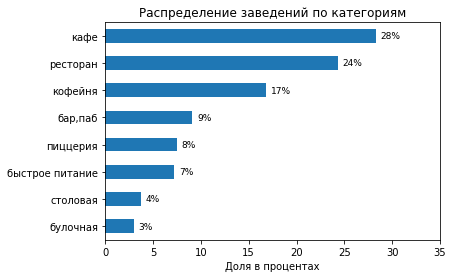

In [38]:
# Сортируем датафрейм для линейчатой диаграммы
category_df = category_df.sort_values(by='percent')

# Строим линейчатую диаграмму
ax = category_df.plot.barh(x='category',
                          y='percent',
                          figsize=(6, 4),
                          legend=False
)

# Настраиваем оформление графика
plt.title('Распределение заведений по категориям')
plt.xlabel('Доля в процентах')
plt.ylabel('')
ax.set_xbound(lower=0, upper=35)

# Добавляем подписи
# ax.bar_label(ax.containers[0], fmt='%.f%%', fontsize=9)
# не работает в версии Практикума

# Добавляем подписи вручную
for container in ax.containers:
    for bar in container:
        # Получаем высоту (значение) столбца
        width = bar.get_width()
        # Координаты для текста: x = значение столбца + небольшой отступ, y = центр столбца
        x_pos = width + 0.5  # отступ от конца столбца
        y_pos = bar.get_y() + bar.get_height() / 2
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{width:.0f}%',  # форматируем как целое число с %
            ha='left',      # горизонтальное выравнивание: влево
            va='center',   # вертикальное выравнивание: по центру
            fontsize=9
        )

# Выводим график
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>График построен верно! Здорово, что ты подписываешь график и его оси, так проще понять что на нем изображено
</div>

Распределение заведений по категориям следующее:
1. кафе - 2376 (28%)
2. ресторан - 2042 (24%)
3. кофейня - 1413 (17%)
4. бар,паб - 764 (9%)
5. пиццерия - 633 (8%)
6. быстрое питание - 603 (7%)
7. столовая - 315 (4%)
8. булочная - 256 (3%)

На кафе, рестораны и кофейни в сумме приходится 69% всех заведений.
В то время как на столовые и булочные в сумме приходится только 7%.

---

## Задача 2

Исследуем распределение количества заведений по административным округам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [39]:
# Создаем датафрейм с распределением заведений по округ
district_df = distribution_by_column(df, 'abbreviated_district', 1)

# Выводим датафрейм
district_df

,abbreviated_district,count,percent
0,ЦАО,2242,26.7
1,САО,898,10.7
2,ЮАО,892,10.6
3,СВАО,890,10.6
4,ЗАО,850,10.1
5,ВАО,798,9.5
6,ЮВАО,714,8.5
7,ЮЗАО,709,8.4
8,СЗАО,409,4.9


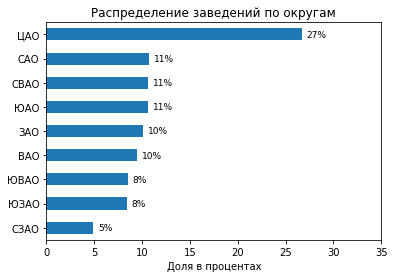

In [40]:
# Сортируем датафрейм для линейчатой диаграммы
district_df = district_df.sort_values(by='percent')

# Строим линейчатую диаграмму
ax = district_df.plot.barh(x='abbreviated_district',
                          y='percent',
                          figsize=(6, 4),
                          legend=False
)

# Настраиваем оформление графика
plt.title('Распределение заведений по округам')
plt.xlabel('Доля в процентах')
plt.ylabel('')
ax.set_xbound(lower=0, upper=35)

# Добавляем подписи
# ax.bar_label(ax.containers[0], fmt='%.f%%', fontsize=9)
# не работает в версии Практикума

# Добавляем подписи вручную
for container in ax.containers:
    for bar in container:
        # Получаем высоту (значение) столбца
        width = bar.get_width()
        # Координаты для текста: x = значение столбца + небольшой отступ, y = центр столбца
        x_pos = width + 0.5  # отступ от конца столбца
        y_pos = bar.get_y() + bar.get_height() / 2
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{width:.0f}%',  # форматируем как целое число с %
            ha='left',      # горизонтальное выравнивание: влево
            va='center',   # вертикальное выравнивание: по центру
            fontsize=9
        )

# Выводим график
plt.show()

Распределение заведений по округам следующее:
1. Центральный административный округ - 2242 (26.7%)
2. Северный административный округ - 898 (10.7%)
3. Южный административный округ - 892 (10.6%)
4. Северо-Восточный административный округ - 890 (10.6%)
5. Западный административный округ - 850 (10.1%)
6. Восточный административный округ - 798 (9.5%)
7. Юго-Восточный административный округ - 714 (8.5%)
8. Юго-Западный административный округ - 709 (8.4%)
9. Северо-Западный административный округ - 409 (4.9%)

Наибольшая доля заведений приходится на Центральный административный округ — 26.7 %.
Наименьшая доля у Северо‑Западного административного округа — 4.9 %.
Остальные округа демонстрируют сравнительно равномерное распределение: от 8% до 11% каждый округ.

Теперь изучим отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [41]:
# Создаем датафрейм с распределением заведений по категориям в Центральном административном округе
category_central_district_df = distribution_by_column(df[df['abbreviated_district'] == 'ЦАО'], 'category', 1)

# Выводим датафрейм
category_central_district_df

,category,count,percent
0,ресторан,670,29.9
1,кафе,464,20.7
2,кофейня,428,19.1
3,"бар,паб",364,16.2
4,пиццерия,113,5.0
5,быстрое питание,87,3.9
6,столовая,66,2.9
7,булочная,50,2.2


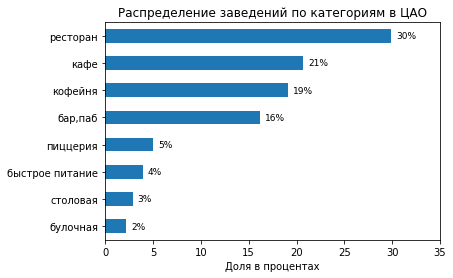

In [42]:
# Сортируем датафрейм для линейчатой диаграммы
category_central_district_df = category_central_district_df.sort_values(by='percent')

# Строим линейчатую диаграмму
ax = category_central_district_df.plot.barh(x='category',
                                            y='percent',
                                            figsize=(6, 4),
                                            legend=False
)

# Настраиваем оформление графика
plt.title('Распределение заведений по категориям в ЦАО')
plt.xlabel('Доля в процентах')
plt.ylabel('')
ax.set_xbound(lower=0, upper=35)

# Добавляем подписи
# ax.bar_label(ax.containers[0], fmt='%.f%%', fontsize=9)
# не работает в данной версии

# Добавляем подписи вручную
for container in ax.containers:
    for bar in container:
        # Получаем высоту (значение) столбца
        width = bar.get_width()
        # Координаты для текста: x = значение столбца + небольшой отступ, y = центр столбца
        x_pos = width + 0.5  # отступ от конца столбца
        y_pos = bar.get_y() + bar.get_height() / 2
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{width:.0f}%',  # форматируем как целое число с %
            ha='left',      # горизонтальное выравнивание: влево
            va='center',   # вертикальное выравнивание: по центру
            fontsize=9
        )

# Выводим график
plt.show()

Распределение заведений в Центральном административном округе по категориям следующее:
1. ресторан - 670 (30%)
2. кафе - 464 (31%)
3. кофейня - 428 (19%)
4. бар,паб - 364 (16%)
5. пиццерия - 113 (5%)
6. быстрое питание - 87 (4%)
7. столовая - 66 (3%)
8. булочная - 50 (2%)

На кафе, рестораны и кофейни в сумме приходится 70% всех заведений.
В то время как на столовые и булочные в сумме приходится только 5%.

Сравним между собой распределения заведений по категориям в городе и отдельно только в Центральном округе.

In [43]:
# Объединим два датафрейма с распределением заведений по категориям
# Первый с распределением по всему городу, а второй - по ЦАО
combined_df = category_df[['category', 'percent']].copy()
combined_df = combined_df.merge(category_central_district_df[['category', 'percent']], on='category', suffixes=('_msc', '_central'))

# Выведем объединенный датафрейм
combined_df.sort_values(by=['percent_msc'], ascending=False)

,category,percent_msc,percent_central
7,кафе,28.3,20.7
6,ресторан,24.3,29.9
5,кофейня,16.8,19.1
4,"бар,паб",9.1,16.2
3,пиццерия,7.5,5.0
2,быстрое питание,7.2,3.9
1,столовая,3.7,2.9
0,булочная,3.0,2.2


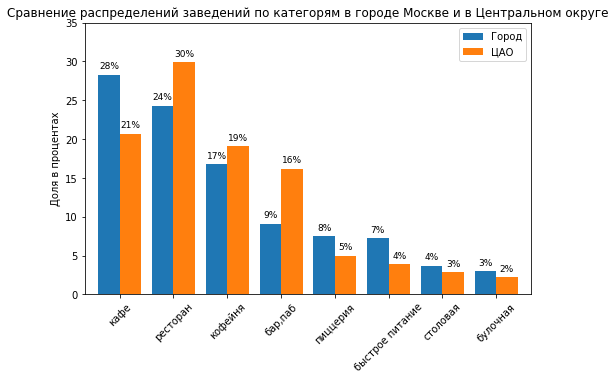

In [44]:
# Сортируем датафрейм для диаграммы
combined_df = combined_df.sort_values(by='percent_msc', ascending=False)

# Строим столбчатую диаграмму
ax = combined_df.plot.bar(x='category',
                          y=['percent_msc', 'percent_central'],
                          width=0.8,
                          figsize=(8, 5)
)

# Оформление графиков
plt.title('Сравнение распределений заведений по категорям в городе Москве и в Центральном округе')
plt.xlabel('')
plt.ylabel('Доля в процентах')
plt.legend(['Город', 'ЦАО'])
plt.xticks(rotation=45)
ax.set_ybound(lower=0, upper=35)

# Добавляем подписи столбцам
#for container in ax.containers:
#    ax.bar_label(container, fmt='%.f%%', fontsize=9)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.5
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.0f}%',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )
    
# Выводим рисунок
plt.show()

Сравнивая между собой распределения заведений по категориям в городе и отдельно только в Центральном округе, можно отметить следующее:
- И в городе, и в ЦАО больше всего кафе, ресторанов и кофейн.
- И в городе, и в ЦАО меньше всего заведений быстрого питания, столовых и булочных.
- Кафе в городе 28%, а в ЦАО их доля ниже и составляет 21%.
- Ресторанов в городе 24%, а в ЦАО их доля выше и составляет 30%.
- Баров/пабов в городе 9%, а в ЦАО их доля выше и составляет 16%.
- Остальные категории не имеют значительных различий.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>В этом задании тоже все корректно. Полученные выводы логичные и соотносятся с реальностью)
</div>

---

## Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Выясним, каких заведений больше — сетевых или несетевых и какие категории заведений чаще являются сетевыми.

In [45]:
# Проверяем распределение данных по значениям в столбце
chain_df = distribution_by_column(df, 'chain', 1)

# Переименуем значения в столбеце с бинарных признаков на названия словами
chain_df['chain'] = chain_df['chain'].replace({1: 'сетевые', 0: 'несетевые'})

# Выведем результат
chain_df

,chain,count,percent
0,несетевые,5199,61.9
1,сетевые,3203,38.1


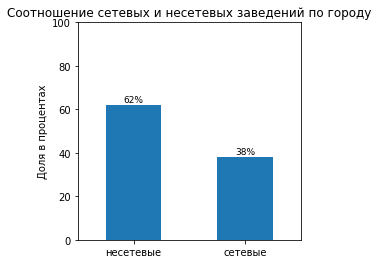

In [46]:
# Строим столбчатую диаграмму
ax = chain_df.plot.bar(x='chain',
                       y='percent',
                       figsize=(4, 4),
                       legend=False
)

# Оформление графиков
plt.title('Соотношение сетевых и несетевых заведений по городу')
plt.xlabel('')
plt.ylabel('Доля в процентах')
plt.xticks(rotation=0)
ax.set_ybound(lower=0, upper=100)

# Добавляем подписи столбцам
# ax.bar_label(ax.containers[0], fmt='%.f%%', fontsize=10)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.5
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.0f}%',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Так как у нас всего две категории, то тут отлично бы подошла круговая диаграмма с подписанными долями.
</div>

В городе несетевых заведений (62%) больше, чем  сетевых заведений (38%).

In [47]:
# Сгруппируем данные по категориям и найдем доли в процентах сетевых/несетвых заведений
df_grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack() * 100

# Сбросим индексы
df_grouped = df_grouped.reset_index()

# Переименуем столбцы с бинарным признаком сети на словесные названия
df_grouped = df_grouped.rename(columns={0: 'non_chain_percent', 1: 'chain_percent'})

# Отсортируем по убыванию процента сетевых заведений
df_grouped = df_grouped.sort_values('chain_percent', ascending=False)

df_grouped

chain,category,non_chain_percent,chain_percent
1,булочная,38.671875,61.328125
5,пиццерия,47.867299,52.132701
4,кофейня,49.044586,50.955414
2,быстрое питание,61.525705,38.474295
6,ресторан,64.299706,35.700294
3,кафе,67.213805,32.786195
7,столовая,72.063492,27.936508
0,"бар,паб",78.010471,21.989529


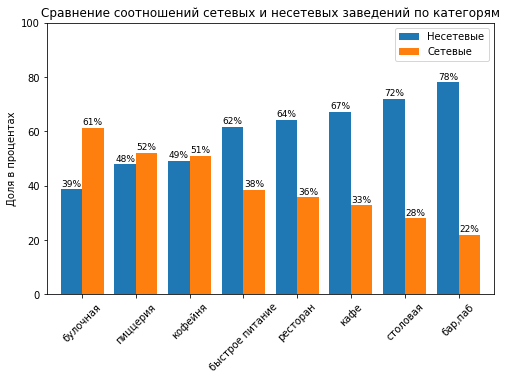

In [48]:
# Строим столбчатую диаграмму
ax = df_grouped.plot.bar(x='category',
                         y=['non_chain_percent', 'chain_percent'],
                         width=0.8,
                         figsize=(8, 5)
)

# Оформление графиков
plt.title('Сравнение соотношений сетевых и несетевых заведений по категорям')
plt.xlabel('')
plt.ylabel('Доля в процентах')
plt.legend(labels=['Несетевые', 'Сетевые'], loc='upper right')
plt.xticks(rotation=45)
ax.set_ybound(lower=0, upper=100)

# Добавляем подписи столбцам
#for container in ax.containers:
#    ax.bar_label(container, fmt='%.f%%', fontsize=9)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.5
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.0f}%',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! В данном случае посмотреть долю сетевых заведений по категориям - наилучшее решение. Так сразу видно где больше всего сетевых заведений
</div>

Сетевые заведения значимо преобладают в булочных (61%).

Несетевые и сетевые заведения примерно поровну занимают доли в пиццериях (48% и 52% соответсвенно) и кофейнях (49% и 51% соответсвенно).

Несетевые заведения значимо преобладают в следующих категориях: быстрое питание (62%), ресторан (64%), кафе (67%), столовая (72%), бар/паб (78%).

---

## Задача 4

Исследуем количество посадочных мест в заведениях в столбце `seats`. При знакомстве с данными сначала оценим статические показатели, для этого используем метод `describe()`. Не забудем исключить из рассмотрения записи со значением-индикатором пропуска `-1` в данном столбце.

In [49]:
# Оставим только те записи, где содержится информация о посадочных местах
df_non_empty_seats = df[df['seats'] != -1]

# Изучаем статистические показатели столбца
print('Статистические показатели столбца seats:')
df_non_empty_seats['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что не забываешь про заглушки
</div>

Только в 4792 строках из 8402 (57%) есть информация о количестве посадочных мест.

Можно предположить, что данные имеют правое асимметричное распределение, отличное от нормального, т. к. среднее значение `108.36` больше медианы `75`.

Значение стандартного отклонения довольно высокое — `122.84`, и при среднем `108.36` это указывает, что данные могут иметь широкий разброс или много аномально больших значений. Разница между минимальным `0` и максимальным `1288` значениями это подтверждает.

Построим гистограмму распределения значений и диаграмму размаха количества посадочных мест.

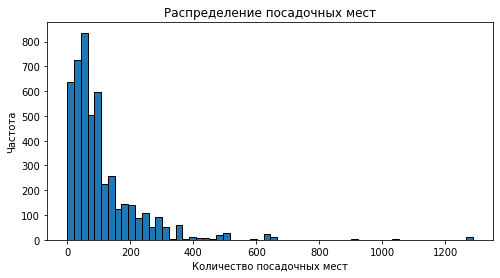

In [50]:
# Строим гистограмму
ax = df_non_empty_seats['seats'].plot.hist(
    bins=60,
    edgecolor='black',
    rot=0,
    figsize=(8, 4)
)

# Настраиваем оформление графика
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Выводим график
plt.show()

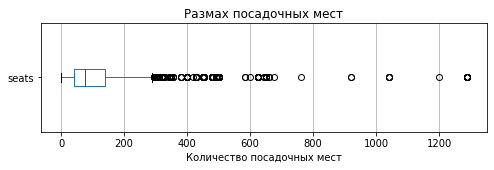

In [51]:
# Строим диаграмму размаха значений в столбце
ax = df_non_empty_seats.boxplot(
    column='seats',
    vert=False,
    medianprops={'color': 'red'},
    figsize=(8, 2),
)

# Добавляем оформление
plt.title('Размах посадочных мест')
plt.xlabel('Количество посадочных мест')
ax.grid(axis='y', visible=False)

# Выводим график
plt.show()

В данных явно присутствуют аномально большие значения. Возможные причины таких выбросов:
- технические ошибки в данных;
- человеческих фактор, например, оператор случайно вводил `1288` вместо `128`.
- **наиболее вероятная причина - сбой при парсинге, например, из текста с интервалом количества посадочных мест "12-88" получилось `1288`.**

Так как достоверно восстановить исходные значения из таких выбросов не представляется возможным, то исключаем их из дальнейшего анализа.

Важно отметить, что в данных есть нулевые значения, которые могут означать не фактическое отсутствие посадочных мест (например, как в точках, работающих "только навынос" или в фудкортах), а отсутствие информации или ошибки в данных.

Но судя по описанию, наши данные могут содержать такие точки, работающие "только навынос" или в фудкортах (заведения быстрого питания и булочные), то записи с нулевым значением нельзя исключать из исследования.

Найдем процентиль 0.95 количества посадочных мест и оставим только те записи, где количество мест меньше либо равно процентилю.

In [52]:
# Найдем процентиль 0.95
percentile = df_non_empty_seats['seats'].quantile(0.95)
print(f'Процентиль 0.95 посадочных мест - {percentile}')

Процентиль 0.95 посадочных мест - 307.0


In [53]:
# Оставим в датафрейме записи с посадочными местами меньше либо равно percentile
df_seats_filtered = df_non_empty_seats[df_non_empty_seats['seats'] <= percentile]

# Количество оставшихся строк
df_seats_filtered.shape[0]

4553

После фильтрации аномально больших значений посадочных мест из 4792 строк осталось 4553. Теперь по отфильтрованным данным выведем статистику и построим диаграммы.

In [54]:
# Изучаем статистические показатели столбца
print('Статистические показатели столбца seats:')
df_seats_filtered['seats'].describe()

Статистические показатели столбца seats:


count    4553.000000
mean       88.271909
std        71.058618
min         0.000000
25%        40.000000
50%        70.000000
75%       120.000000
max       307.000000
Name: seats, dtype: float64

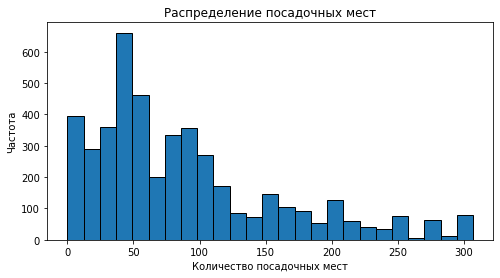

In [55]:
# Строим гистограмму
ax = df_seats_filtered['seats'].plot.hist(
    bins=25,
    edgecolor='black',
    rot=0,
    figsize=(8, 4)
)

# Настраиваем оформление графика
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Выводим график
plt.show()

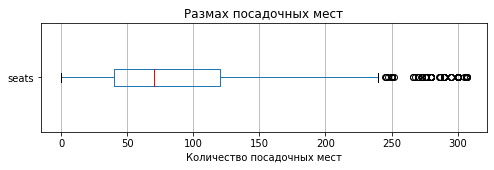

In [56]:
# Строим диаграмму размаха значений в столбце
ax = df_seats_filtered.boxplot(
    column='seats',
    vert=False,
    medianprops={'color': 'red'},
    figsize=(8, 2),
)

# Добавляем оформление
plt.title('Размах посадочных мест')
plt.xlabel('Количество посадочных мест')
ax.grid(axis='y', visible=False)

# Выводим график
plt.show()

После фильтрации аномально высоких значений количества посадочных мест распределение осталось правым асимметричным, но уже среднее значение (`88.27` мест) и медиана (`70` мест) стали близки, а также стандартное отклонение уменьшилось и составленияет `71.06`, максимальное количество мест равно `307`.

Для каждой категории заведений найдем наиболее типичное для него количество посадочных мест. В качестве типичного значения выберем медиану, т. к. распределение мест неравномерно (есть очень крупные заведения). Затем построим столбчатую диаграмму.

In [57]:
# Сгруппируем данные по категориям и найдем медиану посадочных мест
df_grouped = df_seats_filtered.groupby('category')['seats'].median()

# Отсортируем по убыванию посадочных мест
df_grouped = df_grouped.sort_values(ascending=False)

# Выведем результат
df_grouped

category
бар,паб            80.0
ресторан           80.0
столовая           72.0
кофейня            70.0
быстрое питание    60.0
кафе               55.5
пиццерия           50.0
булочная           48.5
Name: seats, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Использовать медиану - верное решение
</div>

In [58]:
# Найдем медиану всех посадочных мест
median_seats = df_seats_filtered['seats'].median()

# Выведем значение
median_seats

70.0

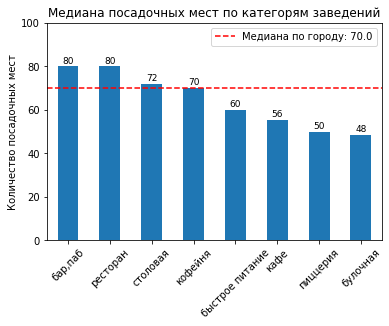

In [59]:
# Строим столбчатую диаграмму
ax = df_grouped.plot.bar(
    figsize=(6, 4),
    label='_nolegend_' # чтобы легенда не отображалась
)

# Покажем медиану по всем заведениям города
ax.axhline(y=median_seats,
           color='red',
           linestyle='--',
           label=f'Медиана по городу: {median_seats}')

# Оформление графика
plt.title('Медиана посадочных мест по категорям заведений')
plt.xlabel('')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=45)
ax.set_ybound(lower=0, upper=100)
ax.legend()

# Добавляем подписи столбцам
#ax.bar_label(ax.containers[0], fontsize=9)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.5
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.0f}',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

- Медиана посадочных мест по всем заведениям города равна 70.
- Медиана посадочных мест у баров (80 мест), ресторанов (80 мест) и столовых (72 места) выше города.
- Медиана посадочных мест у кофеен равна медиане по городу (70 мест).
- Медиана посадочных мест у быстрого питания (60 мест), кафе (55.5 мест), пиццерий (50 мест) и булочных (48.5 мест) ниже города.

Таким образом, можно утверждать, что больше всего посадочных мест у баров и ресторанов, а меньше всего - у пиццерий и булочных.

---

## Задача 5

Исследуем распределение среднего рейтинга у заведений по их категорям.

In [60]:
# Сгруппируем данные по категориям и найдем среднее значение рейтинга
df_grouped = df.groupby('category')['rating'].mean()

# Отсортируем по убыванию рейтинга
df_grouped = df_grouped.sort_values(ascending=False)

# Выведем результат
df_grouped

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float32

In [61]:
# Найдем средний рейтинг по всем заведениям
mean_rating = df['rating'].mean()

# Выведем среднее значение
mean_rating

4.230016

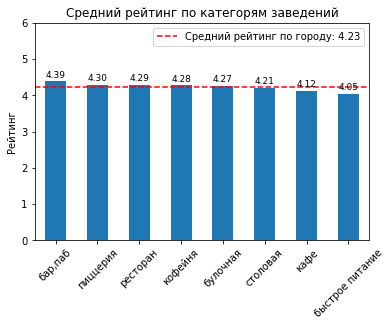

In [62]:
# Строим столбчатую диаграмму
ax = df_grouped.plot.bar(
    figsize=(6, 4),
    label='_nolegend_' # чтобы легенда не отображалась
)

# Покажем средний рейтинг по всем заведениям города
ax.axhline(y=mean_rating,
           color='red',
           linestyle='--',
           label=f'Средний рейтинг по городу: {mean_rating:.2f}')

# Оформление графика
plt.title('Средний рейтинг по категорям заведений')
plt.xlabel('')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)
ax.set_ybound(lower=0, upper=6)
ax.legend()

# Добавляем подписи столбцам
#ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=9)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.05
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.2f}',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

Распределение среднего рейтинга по категориям заведений:
1. бар,паб (4.39)
2. пиццерия (4.30)
3. ресторан (4.29)
4. кофейня (4.28)
5. булочная (4.27)
6. столовая (4.21)
7. кафе (4.12)
8. быстрое питание (4.05)

Размах значений среднего рейтинга небольшой и составляет всего 8% от среднего значения рейтинга по всем заведениям города: (4.39 - 4.05) / 4.23 * 100% ≈ 8%.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты верно делаешь, что используешь среднее, а не медиану для подсчета рейтингов, так мы четче увидим разницу между категориями.
</div>

---

## Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Для этого построим и отобразим матрицу корреляции рейтинга заведения со следующими данными: категория, административный округ Москвы, статус сетевого заведения, количество мест, ценовая категория и признак круглосуточной работы.

In [63]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['rating', 'category', 'abbreviated_district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Сохраняем матрицу корреляции признака rating с другими признаками заведения
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
data_heatmap

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.310473
category,0.198739
abbreviated_district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


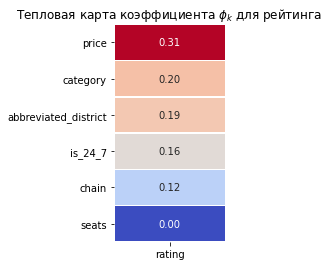

In [64]:
# Строим тепловую карту
plt.figure(figsize=(2, 4))

sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками
            cbar=False # Отключаем цветовую шкалу
)

# Добавляем заголовок и подпись по оси Х
plt.title(r'Тепловая карта коэффициента $\phi_k$ для рейтинга')
plt.xlabel('')

# Выводим график
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что используешь метод phik_matrix()
</div>

По результатам видно, что самая сильная связь рейтинга с ценовой категорией заведения. Проверим ее.

In [65]:
# Найдем средний рейтинг по всем заведениям
mean_rating = df['rating'].mean()

# Сгруппируем данные по ценовым категориям и найдем средний рейтинг
df_grouped = df.groupby('price')['rating'].mean()

# Сортировка по убыванию рейтинга
df_grouped = df_grouped.sort_values(ascending=False)

# Выводим на экран
print(f'Средний рейтинг всех заведений: {mean_rating:.2f}')

print('Распределение рейтинга в зависимости ценовой категории:')
df_grouped

Средний рейтинг всех заведений: 4.23
Распределение рейтинга в зависимости ценовой категории:


price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
неизвестно       4.166778
Name: rating, dtype: float32

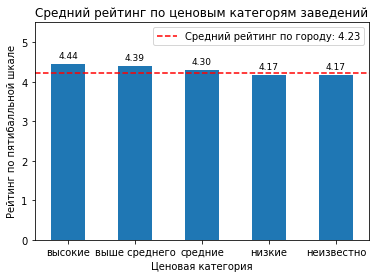

In [66]:
# Построим столбчатую диаграмму

ax = df_grouped.plot.bar(
    figsize=(6, 4),
    label='_nolegend_' # чтобы легенда не отображалась
)

# Покажем средний рейтинг по всем заведениям города
ax.axhline(y=mean_rating,
           color='red',
           linestyle='--',
           label=f'Средний рейтинг по городу: {mean_rating:.2f}')

# Оформление графика
plt.title('Средний рейтинг по ценовым категорям заведений')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг по пятибалльной шкале')
plt.xticks(rotation=0)
ax.set_ybound(lower=0, upper=5.5)
ax.legend()

# Добавляем подписи столбцам
# ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=9)
# не работает в данной версии

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.1
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.2f}',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

Средний рейтинг всех заведений города равен 4.23.
Средний рейтинг оказался выше у заведений с категорией цен "высокие" (4.44) и "выше среднего" (4.39).
Средний рейтинг оказался ниже у заведений с категорией цен "низкие" (4.17) и "неизвестно" (4.17).
У заведений со средними ценами средний рейтинг равен 4.30.

Ценовая категория заведения связана с рейтингом: в заведениях с высокими ценами несколько выше и средний рейтинг. Но эту связь можно охарактеризовать как слабую. Размах значений среднего рейтинга небольшой и составляет всего 6% от среднего значения рейтинга по всем заведениям города: (4.44 - 4.17) / 4.23 * 100% ≈ 6%.

Можно высказать гипотезу, что в заведениях с высокоми ценами выше качество обслуживания и лучше оформление помещения, что обусловливает чуть более высокий рейтинг.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты правильно делаешь, что изучаешь зависимость рейтинга от ценовой категории. Вывод верный
</div>

---

## Задача 7

Сгруппируем данные по нормализованным названиям заведений (новое поле `name_norm`) и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети.

In [67]:
# Оставим в датафрейме только сетевые заведения
df_chain_grouped = df[df['chain'] == 1].groupby('name_norm')['rating'].agg(['count', 'mean'])

df_chain_grouped = df_chain_grouped.rename(columns={'mean': 'rating'})

# Сортируем по убыванию количества заведений одной сети
df_chain_grouped = df_chain_grouped.sort_values(by='count', ascending=False)

# Топ-15 популярных сетей
df_top = df_chain_grouped.head(15)

# Сбросим индексы датафрейма
df_top = df_top.reset_index()

# Выведем топ-15 популярных сетей
df_top

,name_norm,count,rating
0,ШОКОЛАДНИЦА,120,4.177500
1,ДОМИНО_С_ПИЦЦА,76,4.169737
2,ДОДО_ПИЦЦА,74,4.286487
3,ЯНДЕКС_ЛАВКА,72,3.855556
4,ONE_PRICE_COFFEE,71,4.064789
5,COFIX,65,4.075385
6,PRIME,50,4.116000
7,ХИНКАЛЬНАЯ,44,4.322727
8,КОФЕПОРТ,42,4.147619
9,КУЛИНАРНАЯ_ЛАВКА_БРАТЬЕВ_КАРАВАЕВЫХ,39,4.394872


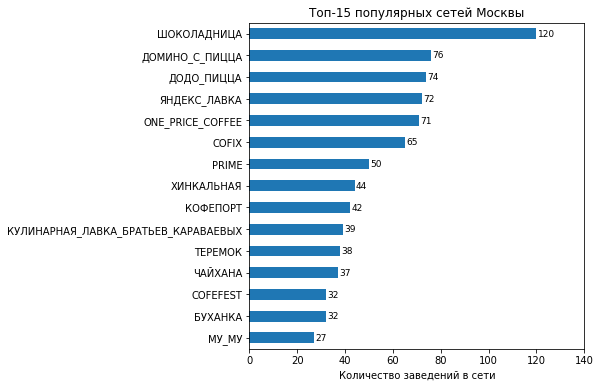

In [68]:
df_top = df_top.sort_values(by='count')

# Строим столбчатую диаграмму
ax = df_top.plot.barh(
    x='name_norm',
    y='count',
    figsize=(6, 6),
    legend=False
)

# Оформление графика
plt.title('Топ-15 популярных сетей Москвы')
plt.xlabel('Количество заведений в сети')
plt.ylabel('')
ax.set_xbound(lower=0, upper=140)

# Добавляем подписи столбцам
#ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=9)

# Добавляем подписи вручную
for container in ax.containers:
    for bar in container:
        # Получаем высоту (значение) столбца
        width = bar.get_width()
        # Координаты для текста: x = значение столбца + небольшой отступ, y = центр столбца
        x_pos = width + 0.5  # отступ от конца столбца
        y_pos = bar.get_y() + bar.get_height() / 2
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{width:.0f}',  # форматируем как целое число с %
            ha='left',      # горизонтальное выравнивание: влево
            va='center',   # вертикальное выравнивание: по центру
            fontsize=9
        )

# Выводим рисунок
plt.show()

Среди 15 самых популярных сетей заведений питания наибольшее количество у Шоколадницы (120 заведений), а наименьшее - у Му-Му (27 заведений). Как видим, сети заведений из топ-15 популярных различаются по количеству точек.

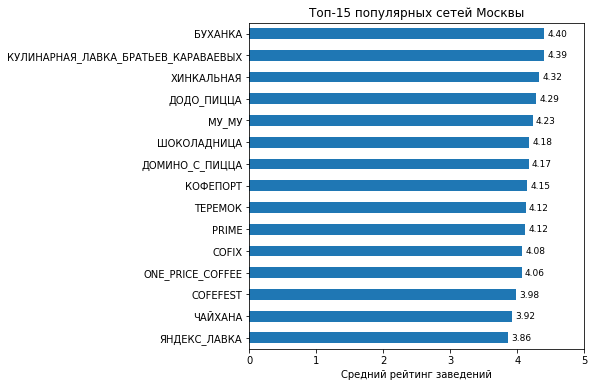

In [69]:
df_top = df_top.sort_values(by='rating')

# Строим столбчатую диаграмму
ax = df_top.plot.barh(
    x='name_norm',
    y='rating',
    figsize=(6, 6),
    legend=False
)

# Оформление графика
plt.title('Топ-15 популярных сетей Москвы')
plt.xlabel('Средний рейтинг заведений')
plt.ylabel('')
ax.set_xbound(lower=0, upper=5)

# Добавляем подписи столбцам
#ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=9)

# Добавляем подписи вручную
for container in ax.containers:
    for bar in container:
        # Получаем высоту (значение) столбца
        width = bar.get_width()
        # Координаты для текста: x = значение столбца + небольшой отступ, y = центр столбца
        x_pos = width + 0.05  # отступ от конца столбца
        y_pos = bar.get_y() + bar.get_height() / 2
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{width:.2f}',  # форматируем как целое число с %
            ha='left',      # горизонтальное выравнивание: влево
            va='center',   # вертикальное выравнивание: по центру
            fontsize=9
        )

# Выводим рисунок
plt.show()

Среди 15 самых популярных сетей заведений питания наибольший рейтинг у Буханки (4.40), а наименьший - у Яндекс Лавки (3.86).
Можно сказать, что сети заведений из топ-15 популярных различаются по рейтингу.

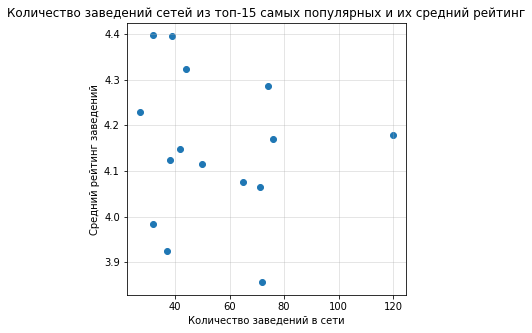

In [70]:
# Построим точечную диаграмму (диаграмму рассеяния)
plt.figure(figsize=(5, 5))
plt.scatter(df_top['count'], df_top['rating'])
plt.xlabel('Количество заведений в сети')
plt.ylabel('Средний рейтинг заведений')
plt.title('Количество заведений сетей из топ-15 самых популярных и их средний рейтинг')

plt.grid(True, alpha=0.4)

plt.show()

Для топ-15 самых популярных сетей на диаграмме рассеяния не видно связи между количеством заведений в сети и их средним рейтингом.

In [71]:
# Отберем записи основного датафрейма с названиями топ-15 самых популярных сетей
df_filtered = df[df['name_norm'].isin(df_top['name_norm'])]

# Выбираем только нужные столбцы
df_filtered = df_filtered[['name_norm', 'category']]

# Сгруппируем данные по названию и категории заведений
# и найдем долю каждой категории в процентах
df_grouped = df_filtered.groupby('name_norm')['category'].value_counts(normalize=True) * 100

# Переместим индексы строк в столбцы
df_grouped = df_grouped.unstack(fill_value=0)

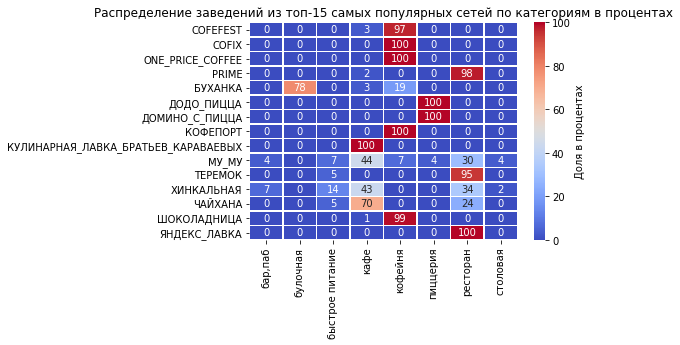

In [72]:
# Строим тепловую карту
sns.heatmap(df_grouped,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.0f', # Форматируем значения
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=True, # Вкл цветовую шкалу сбоку
            cbar_kws={'label': 'Доля в процентах'}
           )

plt.xlabel('')
plt.ylabel('')
plt.title('Распределение заведений из топ-15 самых популярных сетей по категориям в процентах')
plt.show()

Заведения из топ-15 самых популярных сетей распределлились по категориям следующим образом:
- 5 сетей кофеен;
- 3 сети ресторанов;
- 2 сети пиццерий;
- 1 сеть кафе;
- 1 сеть булочных;
- 3 сети, которые можно отнести и к кафе, и к ресторанам.

Таким образом, в топ-15 популярных сетей больше всего кофеен и ресторанов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично! Выводы верные
</div>

---

## Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от округа Москвы. Проанализируем цены в Центральном административном округе и других округах.


In [73]:
# Сгруппируем данные по округу и найдем среднее значение чека
df_grouped = df.groupby('abbreviated_district')['middle_avg_bill'].mean()

# Отсортируем по убыванию среднего чека
df_grouped = df_grouped.sort_values(ascending=False)

# Выведем результат
df_grouped

abbreviated_district
ЦАО     1191.057495
ЗАО     1053.225464
САО      927.959656
ЮАО      834.398071
СЗАО     822.222900
ВАО      820.626953
ЮЗАО     792.561707
СВАО     716.611267
ЮВАО     654.097961
Name: middle_avg_bill, dtype: float32

In [74]:
# Найдем среднее значение чека
mean_bill = df['middle_avg_bill'].mean()

# Выведем среднее значение
print(f'Среднее значение чека: {mean_bill:.2f} руб.')

Среднее значение чека: 958.05 руб.


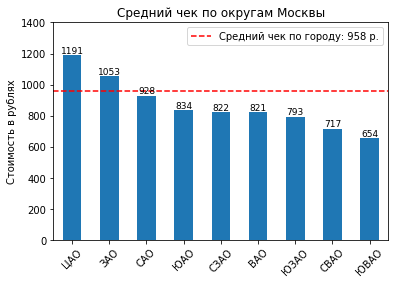

In [75]:
# Строим столбчатую диаграмму
ax = df_grouped.plot.bar(
    figsize=(6, 4),
    label='_nolegend_' # чтобы легенда не отображалась
)

# Покажем средний чек по всем заведениям города
ax.axhline(y=mean_bill,
           color='red',
           linestyle='--',
           label=f'Средний чек по городу: {mean_bill:.0f} р.')

# Оформление графика
plt.title('Средний чек по округам Москвы')
plt.xlabel('')
plt.ylabel('Стоимость в рублях')
plt.xticks(rotation=45)
ax.set_ybound(lower=0, upper=1400)
ax.legend()

# Добавляем подписи столбцам
#ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=9)

# Добавляем подписи к столбцам
for container in ax.containers:
    for bar in container:
        # Получаем высоту столбца (значение данных)
        height = bar.get_height()
        
        # Координаты для текста:
        # x — центр столбца по горизонтали
        x_pos = bar.get_x() + bar.get_width() / 2
        # y — верх столбца + небольшой отступ
        y_pos = height + 0.8
        
        # Добавляем текст
        ax.text(
            x_pos, y_pos,
            f'{height:.0f}',      # значение в процентах
            ha='center',          # горизонтальное выравнивание: по центру
            va='bottom',          # вертикальное выравнивание: снизу от точки
            fontsize=9,
            rotation=0            # без поворота текста
        )

# Выводим рисунок
plt.show()

- Самый большой средний чек в ЦАО (1191 руб.) и ЗАО (1053 руб.).
- Самый маленький средний чек в ЮВАО (654 руб.) и СВАО (717 руб.)
- Разброс значений среднего чека от 654 до 1191 руб., что отражает различия в ценовой политике заведений по округам Москвы.
- Можно высказать гипотезу, что ценовая политика заведений зависит от округа в рамках его благоустройства, стоимости аренды помещений и туристической привлекательности.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут еще можно было бы добавить барплот, где для каждой категории было бы два столбца - со средней и медианной ценой. Это позволило бы сравнить цены внутри округа и округа между собой
</div>

---

## Промежуточный вывод


Задача 1:
- Распределение заведений по категориям следующее:
    1. кафе - 2376 (28%)
    2. ресторан - 2042 (24%)
    3. кофейня - 1413 (17%)
    4. бар,паб - 764 (9%)
    5. пиццерия - 633 (8%)
    6. быстрое питание - 603 (7%)
    7. столовая - 315 (4%)
    8. булочная - 256 (3%)
- На кафе, рестораны и кофейни в сумме приходится 69% всех заведений.
В то время как на столовые и булочные в сумме приходится только 7%.

Задача 2:
- Распределение заведений в Центральном административном округе по категориям следующее:
    1. ресторан - 670 (30%)
    2. кафе - 464 (31%)
    3. кофейня - 428 (19%)
    4. бар,паб - 364 (16%)
    5. пиццерия - 113 (5%)
    6. быстрое питание - 87 (4%)
    7. столовая - 66 (3%)
    8. булочная - 50 (2%)
- На кафе, рестораны и кофейни в сумме приходится 70% всех заведений.
В то время как на столовые и булочные в сумме приходится только 5%.
- Сравнивая между собой распределения заведений по категориям в городе и отдельно только в Центральном округе, можно отметить следующее:
    - И в городе, и в ЦАО больше всего кафе, ресторанов и кофейн.
    - И в городе, и в ЦАО меньше всего заведений быстрого питания, столовых и булочных.
    - Кафе в городе 28%, а в ЦАО их доля ниже и составляет 21%.
    - Ресторанов в городе 24%, а в ЦАО их доля выше и составляет 30%.
    - Баров/пабов в городе 9%, а в ЦАО их доля выше и составляет 16%.
    - Остальные категории не имеют значительных различий.

Задача 3:
- Сетевые заведения значимо преобладают в булочных (61%).
- Несетевые и сетевые заведения примерно поровну занимают доли в пиццериях (48% и 52% соответсвенно) и кофейнях (49% и 51% соответсвенно).
- Несетевые заведения значимо преобладают в следующих категориях: быстрое питание (62%), ресторан (64%), кафе (67%), столовая (72%), бар/паб (78%).

Задача 4:
- После фильтрации аномально высоких значений количества посадочных мест распределение осталось правым асимметричным, но уже среднее значение (`88.27` мест) и медиана (`70` мест) стали близки, а также стандартное отклонение уменьшилось и составленияет `71.06`, максимальное количество мест равно `307`.
- Для сравнения посадочных мест в разных категориях заведений была выбрана медиана, чтобы уменьшить влияние небольшого количества очень крупных заведений:
    - Медиана посадочных мест по всем заведениям города равна 70.
    - Медиана посадочных мест у баров (80 мест), ресторанов (80 мест) и столовых (72 места) выше города.
    - Медиана посадочных мест у кофеен равна медиане по городу (70 мест).
    - Медиана посадочных мест у быстрого питания (60 мест), кафе (55.5 мест), пиццерий (50 мест) и булочных (48.5 мест) ниже города.
- Таким образом, можно утверждать, что больше всего посадочных мест у баров и ресторанов, а меньше всего - у пиццерий и булочных.

Задача 5:
- Распределение среднего рейтинга по категориям заведений:
    1. бар,паб (4.39)
    2. пиццерия (4.30)
    3. ресторан (4.29)
    4. кофейня (4.28)
    5. булочная (4.27)
    6. столовая (4.21)
    7. кафе (4.12)
    8. быстрое питание (4.05)
- Размах значений среднего рейтинга небольшой и составляет всего 8% от среднего значения рейтинга по всем заведениям города: (4.39 - 4.05) / 4.23 * 100% ≈ 8%.

Задача 6:
- После построения корреляционной матрицы коэффициента $\phi_k$ для переменной `rating` выявили самую сильную корреляцию рейтинга с ценовой категорией заведения.
- Средний рейтинг всех заведений города равен 4.23.
Средний рейтинг оказался выше у заведений с категорией цен "высокие" (4.44) и "выше среднего" (4.39).
- Средний рейтинг оказался ниже у заведений с категорией цен "низкие" (4.17) и "неизвестно" (4.17).
- У заведений со "средними" ценами средний рейтинг равен 4.30.
- Ценовая категория заведения связана с рейтингом: в заведениях с высокими ценами несколько выше и средний рейтинг. Но эту связь можно охарактеризовать как слабую. Размах значений среднего рейтинга небольшой и составляет всего 6% от среднего значения рейтинга по всем заведениям города: (4.44 - 4.17) / 4.23 * 100% ≈ 6%.
- Можно высказать гипотезу, что в заведениях с высокоми ценами выше качество обслуживания и лучше оформление помещения, что обусловливает чуть более высокий рейтинг.

Задача 7:
- Среди топ-15 самых популярных сетей заведений питания наибольшее количество у Шоколадницы (120 заведений), а наименьшее - у Му-Му (27 заведений). Как видим, сети заведений из топ-15 популярных различаются по количеству точек.
- Среди 15 самых популярных сетей заведений питания наибольший рейтинг у Буханки (4.40), а наименьший - у Яндекс Лавки (3.86).
Можно сказать, что сети заведений из топ-15 популярных различаются по рейтингу.
- Для топ-15 самых популярных сетей на диаграмме рассеяния не видно связи между количеством заведений в сети и их средним рейтингом.
- Заведения из топ-15 самых популярных сетей распределлились по категориям следующим образом:
    - 5 сетей кофеен;
    - 3 сети ресторанов;
    - 2 сети пиццерий;
    - 1 сеть кафе;
    - 1 сеть булочных;
    - 3 сети, которые можно отнести и к кафе, и к ресторанам.  
- Таким образом, в топ-15 популярных сетей больше всего кофеен и ресторанов.

Задача 8:
- Самый большой средний чек в ЦАО (1191 руб.) и ЗАО (1053 руб.).
- Самый маленький средний чек в ЮВАО (654 руб.) и СВАО (717 руб.)
- Разброс значений среднего чека от 654 до 1191 руб., что отражает различия в ценовой политике заведений по округам Москвы.
- Можно высказать гипотезу, что ценовая политика заведений зависит от округа в рамках его благоустройства, стоимости аренды помещений и туристической привлекательности.

<a class="anchor" id="4-bullet"></a>
# 4. Итоговый вывод и рекомендации

## Общий обзор проделанной работы

### Загрузка данных и знакомство с ними
- Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.
- Датасет rest_price.csv содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.
- Данные соответствовали описанию.
- Объединили два датасета в один единый датафрейм `df`, в котором стало 13 столбцов и 8406 строк.

### Предобработка данных
- Типы данных были успешно оптимизированы с понижением размерности.
- Поле `seats` изменило тип с `float64` на `int16` вместе с заменой 3611 пропусков на значение-индикатор `-1`.
- Добавили столбец `abbreviated_district` с аббревиатурами округов для удобства работы.
- Пропуски содержались в следующих полях `middle_coffee_cup` (94%), `middle_avg_bill` (63%), `price` (61%), `avg_bill` (55%) и `hours` (6%).
- Существенное количество пропусков в полях `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` из-за объединение двух датафреймов с помощью левого присоединения в предыдущем этапе.
- Для полей `middle_coffee_cup` и `middle_avg_bill` информация была извлечена из поля `avg_bill` при наличии в ячейках только определенных подстрок `Цена одной чашки капучино` и `Средний счёт` соотвественно.
- Пропуски в числовых полях `middle_coffee_cup` и `middle_avg_bill` не заполняли.
- Пропуски в текстовых полях `hours`, `price` и `avg_bill` заполним значением-индикатором `неизвестно`.

### Обработка дубликатов
- Изначально полных явных дубликатов не было.
- Нормализовали названия заведений в поле `name` и cохранили результат в новое поле `name_norm`.
- Нормализовали адреса в поле `address` и результат сохранили в новое поле `address_norm`.
- Найдено лишь 8 неявных дубликатов (менее 0.1% всех записей) одновременно по названию и адресу после нормализации:
    - Удалили дубликаты, сохраняя только первый экземпляр.
    - После удаления 4 дубликатов из 8406 строк, осталось 8402 строки.
- Проверили отсутствие неявных дубликатов категориальных значений в остальных полях.

### Создание нового поля `is_24_7`
- Для дальнейшей работы создали столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
    - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
    - логическое значение `False` — в противоположном случае.
- Таких заведений оказалось 730 (8.7% от общего количества).

### Провели исследовательский анализ данных и решили 8 задач

Подробнее в следующем пункте.

## Ответы на исследовательские вопросы





### Распределение заведений по категориям:
- На кафе, рестораны и кофейни в сумме приходится 69% всех заведений. В то время как на столовые и булочные в сумме приходится только 7%.
- Сравнивая между собой распределения заведений по категориям в городе и отдельно только в Центральном округе, можно отметить следующее:
    - Кафе в городе 28%, а в ЦАО их доля ниже и составляет 21%.
    - Ресторанов в городе 24%, а в ЦАО их доля выше и составляет 30%.
    - Баров/пабов в городе 9%, а в ЦАО их доля выше и составляет 16%.
    - Остальные категории не имеют значительных различий.

### Распределение сетевых заведений:
- Сетевые заведения значимо преобладают в булочных (61%).
- Несетевые и сетевые заведения примерно поровну занимают доли в пиццериях и кофейнях.
- Несетевые заведения значимо преобладают в следующих категориях быстрое питание (62%), ресторан (64%), кафе (67%), столовая (72%), бар/паб (78%).

### Распределение посадочных мест по категорям заведений:
- Больше всего посадочных мест у баров (медиана 80 мест) и ресторанов (медиана 80 мест), а меньше всего - у пиццерий (медиана 50 мест) и булочных (медиана 48.5 мест).

### Распределение среднего рейтинга заведений по категорям:

- Самый высокий средний рейтинг у баров/пабов (4.39), самый низкий средний рейтинг у кафе (4.12) и быстрого питания (4.05), остальные категории имеют средний рейтинг от 4.21 до 4.30.

### Самая сильная корреляция рейтинга заведений:

- После построения корреляционной матрицы коэффициента  𝜙𝑘  для переменной rating выявили самую сильную корреляцию рейтинга с ценовой категорией заведения.
- Средний рейтинг оказался выше у заведений с категорией цен "высокие" (4.44) и "выше среднего" (4.39).
- Средний рейтинг оказался ниже у заведений с категорией цен "низкие" (4.17) и "неизвестно" (4.17).
- У заведений со "средними" ценами средний рейтинг равен 4.30.
- Ценовая категория заведения связана с рейтингом: в заведениях с высокими ценами несколько выше и средний рейтинг. Но эту связь можно охарактеризовать как слабую.
- Можно высказать гипотезу, что в заведениях с высокоми ценами выше качество обслуживания и лучше оформление помещения, что обусловливает чуть более высокий рейтинг.

### Топ-15 самых популярных сетевых заведений:

- Среди топ-15 самых популярных сетей заведений питания наибольшее количество у Шоколадницы (120 заведений), а наименьшее - у Му-Му (27 заведений).
- Среди топ-15 самых популярных сетей заведений питания наибольший рейтинг у Буханки (4.40), а наименьший - у Яндекс Лавки (3.86).
- У топ-15 самых популярных сетей не видно связи между количеством заведений в сети и их средним рейтингом.
- В топ-15 популярных сетей больше всего кофеен и ресторанов.

### Средний чек в разных округах города:

- Самый большой средний чек в ЦАО (1191 руб.) и ЗАО (1053 руб.).
- Самый маленький средний чек в ЮВАО (654 руб.) и СВАО (717 руб.)
- Разброс значений среднего чека от 654 до 1191 руб., что отражает различия в ценовой политике заведений по округам Москвы.
- Можно высказать гипотезу, что ценовая политика заведений зависит от округа в рамках его благоустройства, стоимости аренды помещений и туристической привлекательности.

## Рекомендации на основе анализа данных


По условию инвесторы хотят открыть заведение одной из трех категорий: кафе, ресторан или бар. Также не определены цены и расположение заведения.

Инвесторам рекомендуется рассмотреть возможность открытия бара:
- Баров в Москве меньше, чем кафе или ресторанов → меньше конкуренция.
- Также среди сетевых заведений меньше всего баров → меньше конкуренция с крупными игроками рынка.
- Клиенты ставят в среднем выше оценки барам, чем остальным категориям → преимущество в рекомендательных и поисковых системах (например, в поиске на карте).
- Рекомендуется выбрать уровень цен "выше среднего" с соответствующим уровнем обслуживания → средний рейтинг заведения выше → преимущество в рекомендательных и поисковых системах.
- Общее количество посадочных мест рекомендуется около 80.
- Рекомендуется выбрать расположение в ЗАО: благоустроенный район, где средний чек близок к ЦАО, но конкуренции меньше, чем в ЦАО.

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v1:</b>
<br>Отличный проект! Критичных замечаний нет
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующие материалы:

	Книга "Графики, которые убеждают всех" | А. Богачев

<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>